In [2]:
from druxai.utils.data import DrugResponseDataset
import matplotlib.pyplot as plt

In [3]:
filepath = "/Users/niklaskiermeyer/Desktop/Codespace/DruxAI/data/preprocessed"
data = DrugResponseDataset(filepath)

INFO     Loaded targets with shape: (556840, 8)                                                                    
INFO     Loaded molecular data with shape: (1479, 19193)                                                           


In [4]:
print(f"Unique Cell Line Count: {len(data.targets['cell_line'].unique())}")
print(f"Unique Drug Count: {len(data.targets['DRUG'].unique())}")

Unique Cell Line Count: 476
Unique Drug Count: 1149


In [7]:
# Group the data by cell line and count the number of unique drugs for each cell line
drug_counts_per_cell_line = data.targets.groupby("cell_line")["DRUG"].nunique().sort_values()
drug_counts_per_cell_line


cell_line
ACH-000311     554
ACH-000736     569
ACH-000721     603
ACH-000947     636
ACH-000826     658
              ... 
ACH-000661    1117
ACH-000966    1117
ACH-000696    1119
ACH-000280    1120
ACH-000627    1122
Name: DRUG, Length: 476, dtype: int64

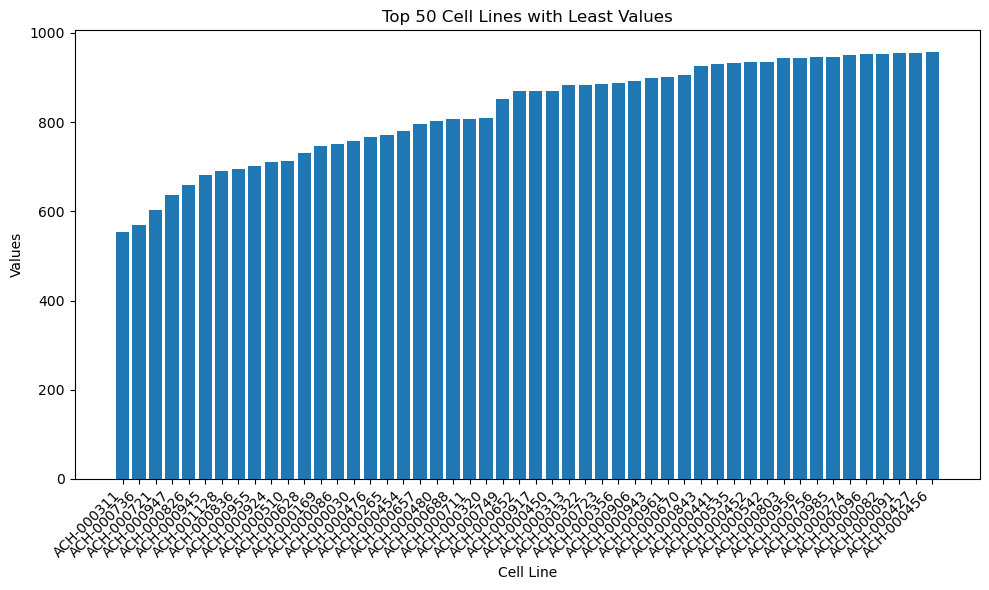

In [11]:
# Choose the value of k (number of cell lines with the least values to plot)
k = 50  # Change this value as per your requirement

# Select the first k rows after sorting
top_k = drug_counts_per_cell_line.head(k)

# Plot the selected rows
plt.figure(figsize=(10, 6))
plt.bar(top_k.index, top_k)
plt.xlabel("Cell Line")
plt.ylabel("Values")
plt.title(f"Top Cell {k} Lines with Least Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [15]:
# Group Data by Drug to see which drugs may be underpresented
cell_line_counts_per_drug = data.targets.groupby("DRUG")["cell_line"].nunique().sort_values()
cell_line_counts_per_drug

DRUG
ARIPIPRAZOLE         27
K-STROPHANTHIDIN     85
HYDROCORTISONE       89
ADAROTENE           100
THIOPROPERAZINE     153
                   ... 
CRIZOTINIB          475
NVP-AUY922          475
DINACICLIB          476
DISULFIRAM          476
TALAZOPARIB         476
Name: cell_line, Length: 1149, dtype: int64

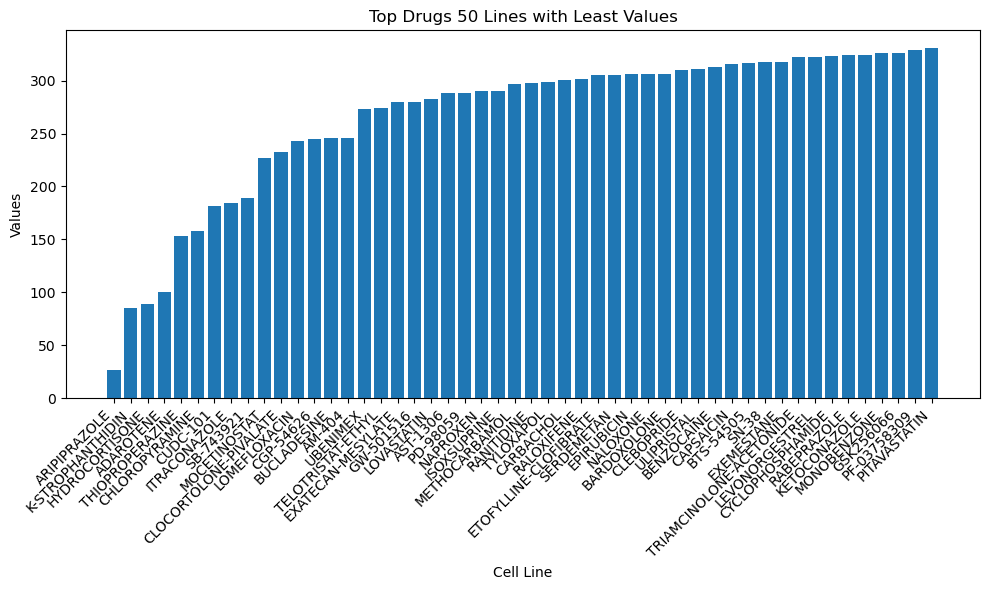

In [17]:
# Choose the value of k (number of cell lines with the least values to plot)
k = 50  # Change this value as per your requirement

# Select the first k rows after sorting
top_k = cell_line_counts_per_drug.head(k)

# Plot the selected rows
plt.figure(figsize=(10, 6))
plt.bar(top_k.index, top_k)
plt.xlabel("Cell Line")
plt.ylabel("Values")
plt.title(f"Top Drugs {k} Lines with Least Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()